In [1]:
import sqlite3
import time
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
ROW_COUNT = [100, 1000, int(1e4), int(1e5), int(1e6)] #, int(1e7)]

In [3]:
insert_times = []
find_times = []

for i in ROW_COUNT:
    conn = sqlite3.connect('goodol-tick_data_{}.db'.format(i))
    c = conn.cursor()
    c.execute('''CREATE TABLE stocks{}
             (date text, trans text, symbol text, qty real, price real)'''.format(i))
    purchases = [('2006-03-28', 'BUY', 'IBM', 1000, i+45),
             ('2006-04-05', 'BUY', 'MSFT', 1000, i+72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, i+53.00),
            ] * i
    
    start = time.time()
    c.executemany('INSERT INTO stocks{} VALUES (?,?,?,?,?)'.format(i), purchases)
    end = time.time()
    insert_times.append(end-start)
    start1 = time.time()
    a = list(c.execute('SELECT * FROM stocks{}'.format(i)))
    end1 = time.time()
    find_times.append(end1-start1)

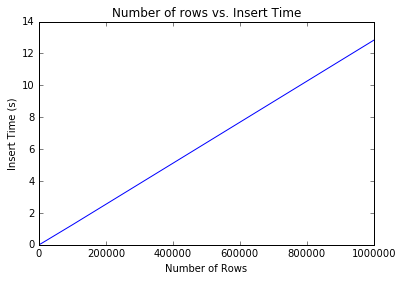

In [4]:
plt.plot(ROW_COUNT, insert_times)
plt.title('Number of rows vs. Insert Time')
plt.xlabel('Number of Rows')
plt.ylabel('Insert Time (s)')

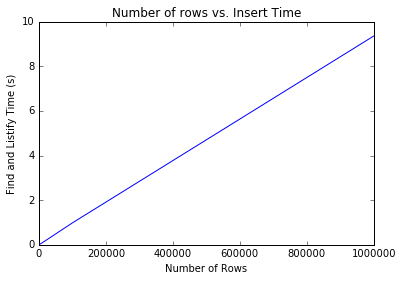

In [5]:
plt.plot(ROW_COUNT, find_times)
plt.title('Number of rows vs. Insert Time')
plt.xlabel('Number of Rows')
plt.ylabel('Find and Listify Time (s)')